In [4]:
import math
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN
from PIL import Image

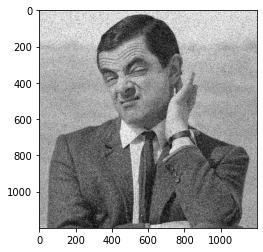

In [5]:
img = cv2.imread('mr.bean.jpg',0)
row ,col = img.shape
multi_rc = row//3 * col//3
for i in range(multi_rc):
    a = random.randint(1,row-1)
    b = random.randint(1,col-1)
    img[a:a+1,b:b+1] = 255

for i in range(multi_rc):
    a = random.randint(1,row-1)
    b = random.randint(1,col-1)
    img[a:a+1,b:b+1] = 0
plt.imshow(img,cmap='gray')

In [6]:
img = cv2.imread('mr.bean.jpg')
row ,col = img.shape
for i in range(1,row-2):
    for j in range(1,col-2):
        image = img[i-1:i+2,j-1:j+2]
        image_reshape = image.reshape(9)
        image_reshape_sorted = np.sort(image_reshape)
        img[i,j] = image_reshape_sorted[4]
        
plt.imshow(img,cmap='gray')

ValueError: too many values to unpack (expected 2)

In [1]:
detector = MTCNN()
img = cv2.imread('mr.bean.jpg')
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
faces = detector.detect_faces(img_rgb)

def rotate(img,left,right):
    left_x , left_y = left
    right_x , right_y = right
    if left_y > right_y:
        point = (right_x,left_y)
        rot = -1
    else:
        point = (left_x,right_y)
        rot = 1
    
    a = np.sqrt(np.sum(np.multiply((np.array(left)-np.array(point)),(np.array(left)-np.array(point)))))
    b = np.sqrt(np.sum(np.multiply((np.array(right)-np.array(point)),(np.array(right)-np.array(point)))))
    c = np.sqrt(np.sum(np.multiply((np.array(right)-np.array(left)),(np.array(right)-np.array(left)))))
    if b != 0 and c != 0:
        cos = (math.pow(b,2) + math.pow(c,2) - math.pow(a,2))/(2*b*c)
        angle = np.arccos(cos)
        angle = (angle * 180) / math.pi

        if rot ==-1:
            angle= 90 - angle
        
        img = Image.fromarray(img_rgb)
        img = np.array(img.rotate(rot * angle)) 
    return img

detection = faces[0]
eyes = detection['keypoints']
left_eye = eyes['left_eye']
right_eye = eyes['right_eye']
img = rotate(img,left_eye,right_eye)

plt.imshow(img)

NameError: name 'MTCNN' is not defined